In [4]:
import numpy as np
import matplotlib.pyplot as plt
from math import exp, pi, sqrt, log, erf


In [5]:
def BBB(pw1, pw2, u1, u2, s1, s2):
    expo = (1/8)*(u2-u1)*(2/(s1+s2))*(u2-u1)+(1/2)*(log(((s1+s2)/2)/sqrt(abs(s1)*abs(s2))))
    prod = sqrt(pw1*pw2)
    return prod*exp(expo)

def RandomPoints(u, v, count):
    return np.random.normal(u, v, count)

def Likelihood(p, u, v):
    twov = 2*v
    num = exp((-1)*((p-u)**2)/twov)
    den = sqrt(pi*twov)
    return num/den

def Predict(test, u1, v1, u2, v2, pw1, pw2):
    current = 0
    Correct = 0
    # print(test, test.shape)
    for i in range(test.shape[0]):
        lk1 = Likelihood(test[i], u1, v1)*pw1
        lk2 = Likelihood(test[i], u2, v2)*pw2
        if i >= 10:
            current = 1
        if lk1 > lk2:
            if current == 0:
                Correct += 1
        else:
            if current == 1:
                Correct += 1
    ret = [(Correct/test.shape[0])*100, ((test.shape[0]-Correct)/test.shape[0])*100]
    return ret

def TrueError(size, pw1, pw2, u1, u2, v1, v2):
    v1 = sqrt(v1)
    v2 = sqrt(v2)
    xm = log(2)*2
    if pw1 == pw2:
        xm = ((u1*v2) + (u2*v1))/(v1+v2)
    diff = [xm-u1, xm-u2]
    div = [2**(1/2)*v1, 2**(1/2)*v2]
    erf1 = (1/2)*erf(diff[0])
    erf2 = (1/2)*erf(diff[1])

    err1 = pw1
    err2 = pw2
    err1 = err1*((1/2)-erf1/div[0])
    err2 = err2*((1/2)+erf2/div[1])
    final_err = err1+err2
    return final_err

def Plot(x_values, y_values, key):
    # plt.figure()
    color = ['b', 'g', 'r', 'c']
    plt.plot(x_values, y_values, color[1], label="Empirical Error Rate")
    plt.xlabel("Sample Points")
    # x = np.linspace(0, 1, 100)
    # plt.plot(x, x, 'b')
    plt.ylabel("Empirical Error Rate")
    plt.title("Errors")
    plt.legend(loc='lower right')
    plt.show()  
    plt.savefig(key+str(".png"))


Te: 0.3159755033958127
Te: 0.3159755033958127
Te: 0.3159755033958127
Te: 0.3159755033958127
Te: 0.3159755033958127
Te: 0.3159755033958127
Acc 56.01666666666667
EE 43.98333333333333
BB 0.5665742265334132
TE 0.3159755033958127


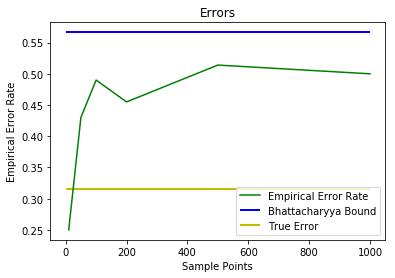

Te: 0.40043510562142737
Te: 0.40043510562142737
Te: 0.40043510562142737
Te: 0.40043510562142737
Te: 0.40043510562142737
Te: 0.40043510562142737
Acc 28.791666666666668
EE 71.20833333333333
BB 0.5018075002908821
TE 0.40043510562142737


<Figure size 432x288 with 0 Axes>

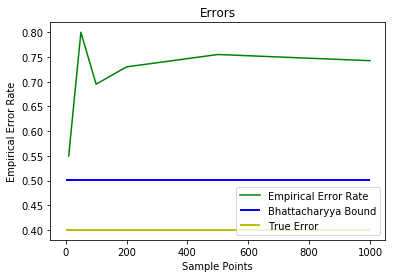

Te: 0.3698750305467384
Te: 0.3698750305467384
Te: 0.3698750305467384
Te: 0.3698750305467384
Te: 0.3698750305467384
Te: 0.3698750305467384
Acc 55.85833333333334
EE 44.14166666666667
BB 0.5322472294589297
TE 0.3698750305467384


<Figure size 432x288 with 0 Axes>

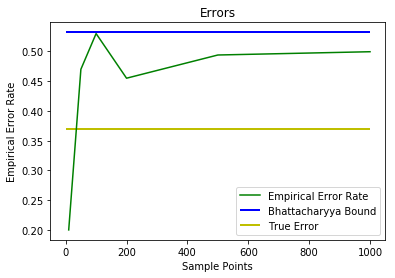

Te: 0.3658174126202794
Te: 0.3658174126202794
Te: 0.3658174126202794
Te: 0.3658174126202794
Te: 0.3658174126202794
Te: 0.3658174126202794
Acc 63.083333333333336
EE 36.916666666666664
BB 0.5719368690729513
TE 0.3658174126202794


<Figure size 432x288 with 0 Axes>

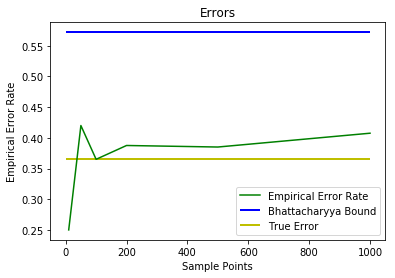

<Figure size 432x288 with 0 Axes>

In [6]:
given = [
    [0.5, 0.5, -0.5, 0.5, 1, 1],
    [2/3, 1/3, -0.5, 0.5, 2, 2],
    [0.5, 0.5, -0.5, 0.5, 2, 2],
    [0.5, 0.5, -0.5, 0.5, 3, 1]
]
PopCount = [10, 50, 100, 200, 500, 1000]
PopCount = np.asarray(PopCount)
for i in range(len(given)):
    # print("I:", i)
    EE = np.zeros((PopCount.shape[0]), dtype=float)
    BB = np.zeros((PopCount.shape[0]), dtype=float)
    TE = np.zeros((PopCount.shape[0]), dtype=float)
    Acc = np.zeros((PopCount.shape[0], 2), dtype=float)

    for j in range(PopCount.shape[0]):
        pw1 = given[i][0]
        pw2 = given[i][1]
        u1 = given[i][2]
        u2 = given[i][3]
        v1 = given[i][4]
        v2 = given[i][5]

        perror = BBB(pw1, pw2, u1, u2, v1, v2)
        # print(perror)
        points1 = RandomPoints(u1, v1, PopCount[j])
        points2 = RandomPoints(u2, v2, PopCount[j])
        # print(points1, points2)
        points = np.concatenate((points1, points2))
        # print(points, points.shape)
        retVal = Predict(points, u1, v1, u2, v2, pw1, pw2)
        # print("Acc:", retVal[0])
        # print("Empirical Error:", retVal[1]/100)
        # print("Perror", perror)
        # print(j)
        Acc[j, 0] = retVal[0]
        Acc[j, 1] = retVal[1]
        EE[j] = retVal[1]/100
        BB[j] = perror
        TE[j] = TrueError(0, pw1, pw2, u1, u2, v1, v2)
        print("Te:", TE[j])
    print("Acc", np.sum(Acc[:, 0])/PopCount.shape[0])
    print("EE", np.sum(Acc[:, 1])/PopCount.shape[0])
    print("BB", perror)
    print("TE", TE[0])

    plt.figure()
    # plt.plot(BB, 0, color='b', label="Bhattacharyya Bound")
    # plt.plot(TE, 0, color='y', label="True Error")
    plt.hlines(xmin=0, xmax=1000, y=BB, linewidth=2, color='b', label="Bhattacharyya Bound")
    plt.hlines(xmin=0, xmax=1000, y=TE, linewidth=2, color='y', label="True Error")

    Plot(PopCount, EE, str(i))
    # break
